# Regressão Linear Múltipla 
### Nesse arquivo iremos analisar a base de dados de "stats" de vários players de CS.
### Com base nas informações, construiremos um modelo de regressão linear múltipla que será capaz de prever a quantidade de "kills" com base na na quantidade "HS" e de "Damage".




In [29]:
# importando as bibliotecas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Vamos realizar uma análise exploratória dos dados inicialmente para sabermos algumas informações descritivas dos dados que iremos trabalhar.

In [30]:
data= pd.read_csv("C:/Users/Vinicius/Desktop/Dados/tb_lobby_stats_player.csv")
display(data)
data.info()
data.describe()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,...,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57
184148,172908,2716,178497,15,1,22,5,0,1,0.0,...,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48
184149,172909,2716,178498,9,6,23,2,0,3,0.0,...,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10
184150,172910,2716,178499,15,5,20,6,0,2,0.0,...,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184152 entries, 0 to 184151
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idLobbyGame     184152 non-null  int64  
 1   idPlayer        184152 non-null  int64  
 2   idRoom          184152 non-null  int64  
 3   qtKill          184152 non-null  int64  
 4   qtAssist        184152 non-null  int64  
 5   qtDeath         184152 non-null  int64  
 6   qtHs            184152 non-null  int64  
 7   qtBombeDefuse   184152 non-null  int64  
 8   qtBombePlant    184152 non-null  int64  
 9   qtTk            184032 non-null  float64
 10  qtTkAssist      184032 non-null  float64
 11  qt1Kill         184152 non-null  int64  
 12  qt2Kill         184152 non-null  int64  
 13  qt3Kill         184152 non-null  int64  
 14  qt4Kill         184152 non-null  int64  
 15  qt5Kill         184152 non-null  int64  
 16  qtPlusKill      184152 non-null  int64  
 17  qtFirstKil

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
count,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184032.000000,...,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,184152.000000
mean,84720.886854,1361.148622,88343.226248,19.113531,3.756033,18.792459,7.640123,0.316054,1.321349,0.022463,...,3.095254,0.570012,9.642889,29.305194,13.525509,1.902511,5.106091,2.265641,2.496509,0.493766
std,49931.048091,784.157397,51564.451107,7.481041,2.205265,5.211614,4.042324,0.575803,1.336699,0.156566,...,1.885027,0.906774,4.769723,11.657993,7.102067,1.650325,2.924184,2.062294,2.162557,0.499962
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41399.750000,676.000000,43742.750000,14.000000,2.000000,16.000000,5.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,6.000000,21.000000,8.000000,1.000000,3.000000,1.000000,1.000000,0.000000
50%,83838.500000,1388.000000,87877.500000,19.000000,4.000000,19.000000,7.000000,0.000000,1.000000,0.000000,...,3.000000,0.000000,9.000000,28.000000,13.000000,2.000000,5.000000,2.000000,2.000000,0.000000
75%,127911.250000,2061.000000,133000.250000,24.000000,5.000000,22.000000,10.000000,1.000000,2.000000,0.000000,...,4.000000,1.000000,12.000000,36.000000,18.000000,3.000000,7.000000,3.000000,4.000000,1.000000
max,172911.000000,2716.000000,178500.000000,85.000000,24.000000,65.000000,41.000000,5.000000,12.000000,12.000000,...,20.000000,14.000000,49.000000,122.000000,77.000000,17.000000,30.000000,21.000000,22.000000,1.000000


### Nos gráficos abaixo, podemos observar os coeficientes de correlação de Pearson, onde é possível identificar as variáveis que mais se correlacionam positivamente com a nossa variável dependente, no caso a quantidade "Kill". Observamos que as variáveis "vlDamage" e "qtHs" possuem os índices de correlação mais altos, e por isso vamos utiliza-lás para treinar o nosso modelo.

In [31]:
datafilter = data[['qtKill', 'qtAssist','qtDeath', 'qtHs', 'vlDamage']]
corr = datafilter.corr()
corr.style.background_gradient(cmap='coolwarm')

,qtKill,qtAssist,qtDeath,qtHs,vlDamage
qtKill,1.000000,0.243858,0.293997,0.734080,0.955880
qtAssist,0.243858,1.000000,0.316440,0.152456,0.403197
qtDeath,0.293997,0.316440,1.000000,0.217032,0.394373
qtHs,0.734080,0.152456,0.217032,1.000000,0.743856
vlDamage,0.955880,0.403197,0.394373,0.743856,1.000000


<AxesSubplot:>

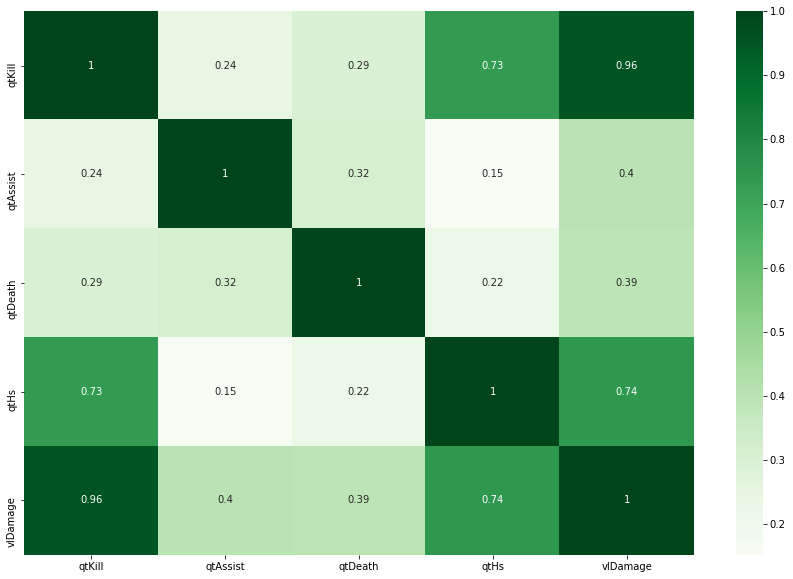

In [32]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(datafilter.corr(), cmap="Greens",annot=True)

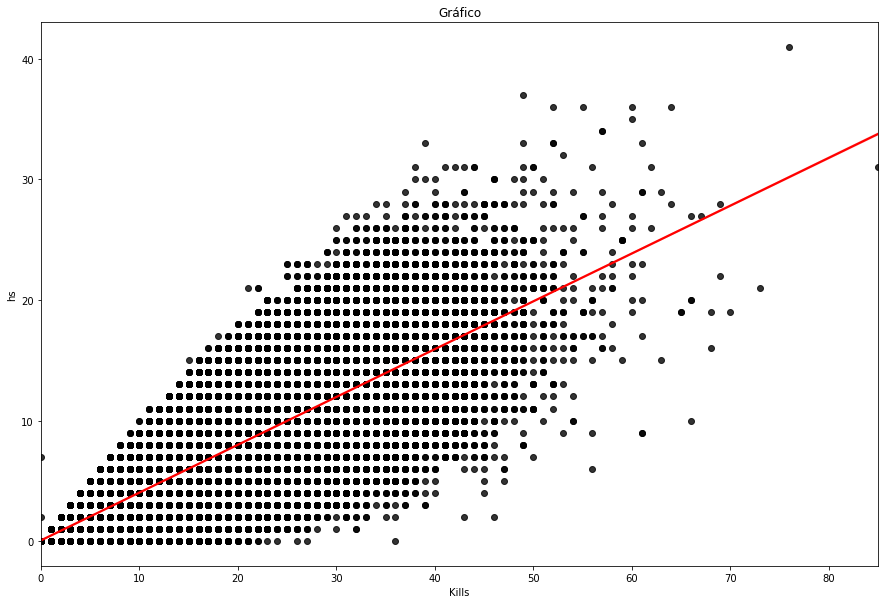

In [52]:
f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x=data['qtKill'], y=data['qtHs'], data=data, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Gráfico Kill - HS")
plt.xlabel('Kills' )
plt.ylabel("HS")
plt.show()

<AxesSubplot:xlabel='qtKill', ylabel='vlDamage'>

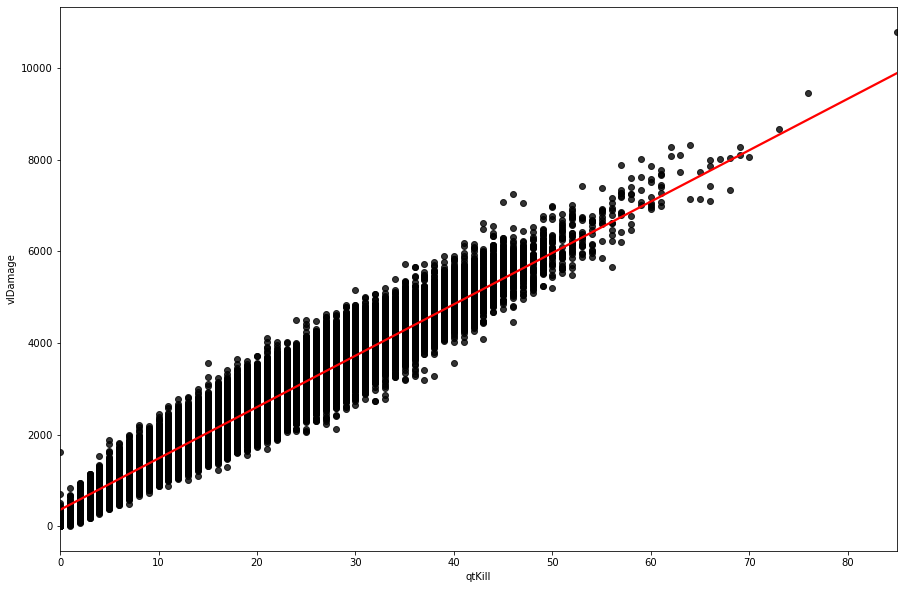

In [51]:
f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x=data['qtKill'], y=data['vlDamage'], data=data, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Gráfico Kill - Damage")
plt.xlabel('Kills' )
plt.ylabel("HS")

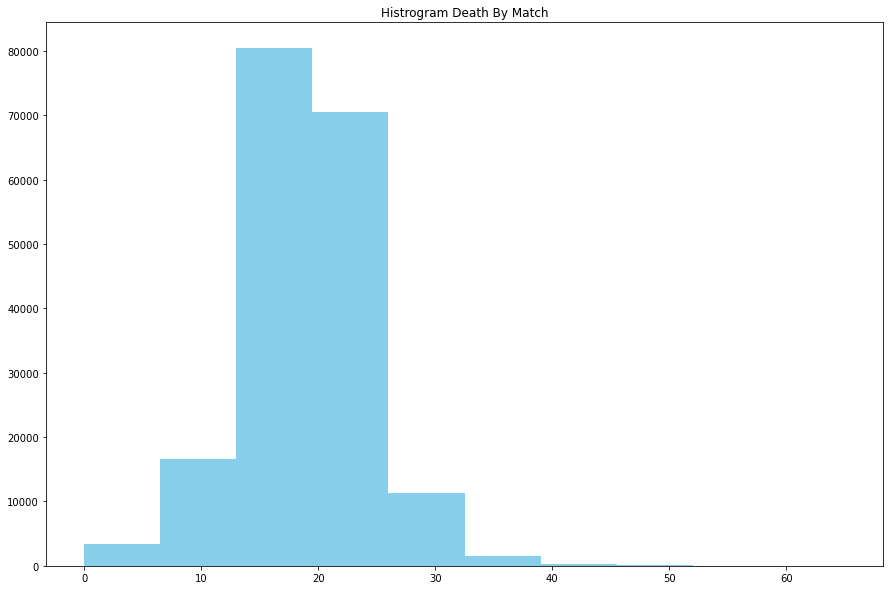

In [55]:
plt.figure(figsize= (15, 10))
plt.hist(data['qtDeath'], color = "skyblue")
plt.title("Histrogram Death By Match")
plt.show()

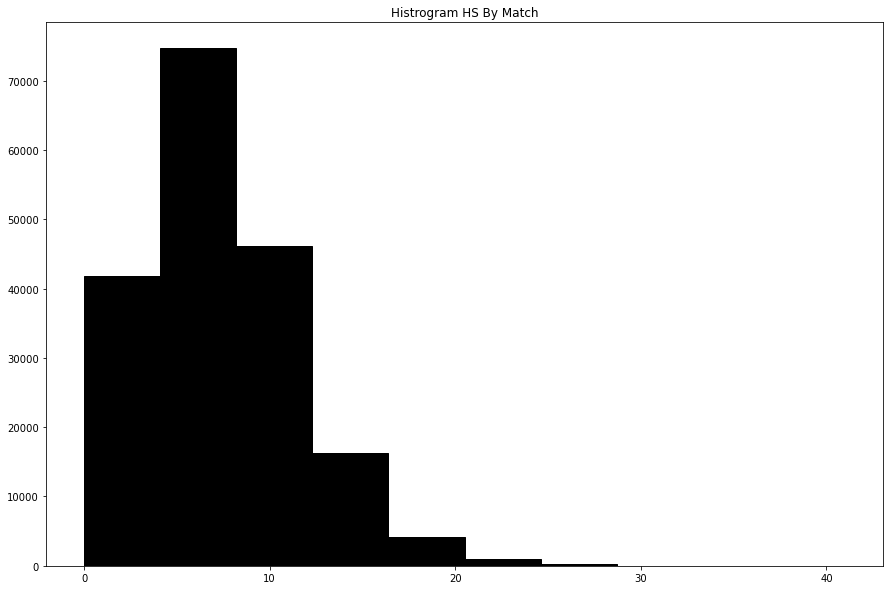

In [36]:
plt.figure(figsize= (15, 10))
plt.hist(data['qtHs'], color = "black", ec="black")
plt.title("Histrogram HS By Match")
plt.show()

### Agora que sabamos as variáveis que melhor se correlacionam com a variável dependente, vamos separar a nossa base de dados em 80% para treino do modelo e 20% para realizarmos previsões e avaliarmos a precisão do modelo

In [37]:
xcs = data[['qtHs','vlDamage']]
ycs = data['qtKill']

x_traincs, x_testcs, y_traincs, y_testcs = train_test_split(xcs,ycs, test_size=0.2)

In [53]:
linear = LinearRegression().fit(x_traincs, y_traincs)
predictioncs = linear.predict(x_testcs)

### Com o modelo treinado, podemos ver o coeficiente de determinação (ou R^2) para medirmos o grau de precisão que o modelo apresentou na base de dados de treino.

In [68]:
linear.score(x_traincs, y_traincs)

0.914860113720179

### Também podemos montar um dataframe com os valores verdadeiros(esperados) e os valores que foram preditos pelo modelo, e assim termos uma noção do grau de diferença que o modelo está apresentando com os números reais.

In [62]:
compcs = pd.DataFrame(y_testcs)
compcs.columns = ['Y_test']
compcs['Prediction'] = predictioncs
compcs['Diference Between Y_test and Prediction'] = compcs['Prediction'] - compcs['Y_test']
display(compcs)

,Y_test,Prediction,Diference Between Y_test and Prediction
46109,20,20.275408,0.275408
10223,19,19.769980,0.769980
100744,18,19.134949,1.134949
41522,5,6.894332,1.894332
94265,11,12.144446,1.144446
...,...,...,...
172323,24,22.486622,-1.513378
45905,18,16.817590,-1.182410
46968,39,42.792321,3.792321
79370,14,13.575388,-0.424612


In [63]:
compcs.describe()

,Y_test,Prediction,Diference Between Y_test and Prediction
count,36831.000000,36831.000000,36831.000000
mean,19.082946,19.081905,-0.001042
std,7.438654,7.133567,2.168296
min,0.000000,-1.172412,-11.713751
25%,14.000000,14.394757,-1.407173
50%,19.000000,18.690909,-0.008148
75%,24.000000,23.267390,1.439554
max,67.000000,64.156286,12.118511


In [42]:
linear.score(x_testcs, y_testcs)

0.9150333432680284

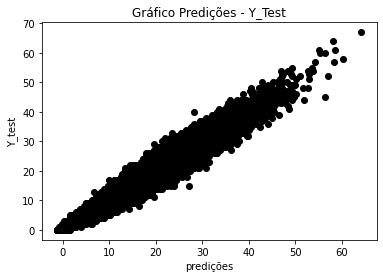

In [67]:
fig, ax = plt.subplots()
ax.scatter(compcs['Prediction'], compcs['Y_test'], color = "black")
plt.title("Gráfico Predições - Y_Test")
plt.xlabel("predições" )
plt.ylabel("Y_test")
plt.show()


### Como vemos no gráfico acima, o modelo está conseguindo prever a variável dependente(resposta) com uma grande precisão, aproximadamnte 91,5%. Isso significa que o modelo linear explica 91,5% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas no modelo linear.